In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pandas as pd

In [2]:
filepath = '2photon/sub-661968859_ses-682746585_behavior+ophys.nwb'
nwb = h5py.File(filepath,mode='r')

In [3]:
start_times = np.array(nwb['intervals/epochs/start_time'])
stop_times = np.array(nwb['intervals/epochs/stop_time'])
contrasts = np.array(nwb['intervals/epochs/contrast'])
directions = np.array(nwb['intervals/epochs/direction'])
sfs = np.array(nwb['intervals/epochs/spatial_frequency'])
tfs = np.array(nwb['intervals/epochs/temporal_frequency'])

In [4]:
df = pd.DataFrame(np.zeros((len(start_times),6)),columns=('Start','End','Contrast','Ori','SF','TF'))
df['Start'] = start_times
df['End'] = stop_times
df['Contrast'] = contrasts
df['Orientation'] = directions
df['SF'] = sfs
df['TF'] = tfs
df.head()

,Start,End,Contrast,Ori,SF,TF,Orientation
0,194.0,254.0,0.05,0.0,0.04,1.0,270.0
1,284.0,344.0,0.05,0.0,0.04,1.0,270.0
2,375.0,435.0,0.10,0.0,0.04,1.0,45.0
3,465.0,525.0,0.80,0.0,0.04,1.0,0.0
4,556.0,616.0,0.60,0.0,0.04,1.0,135.0


In [5]:
nwb.keys()

<KeysViewHDF5 ['acquisition', 'analysis', 'file_create_date', 'general', 'identifier', 'intervals', 'processing', 'session_description', 'session_start_time', 'specifications', 'stimulus', 'timestamps_reference_time', 'units']>

In [6]:
nwb['processing/brain_observatory_pipeline/'].keys()

<KeysViewHDF5 ['Fluorescence', 'ImageSegmentation', 'MotionCorrection', 'RunningBehavior', 'l0_events', 'max_project']>

In [7]:
nwb['processing/brain_observatory_pipeline/max_project'].keys()

<KeysViewHDF5 ['data', 'dimension', 'imaging_plane', 'starting_time']>

In [8]:
nwb['processing/brain_observatory_pipeline/max_project/imaging_plane'].keys()

<KeysViewHDF5 ['description', 'device', 'excitation_lambda', 'imaging_rate', 'indicator', 'location', 'optical_channel', 'reference_frame']>

In [9]:
nwb['processing/brain_observatory_pipeline/Fluorescence'].keys()

<KeysViewHDF5 ['DfOverF', 'demixed_traces', 'neuropil_traces', 'raw_traces']>

In [10]:
DfOverF = np.array(nwb['processing/brain_observatory_pipeline/Fluorescence/DfOverF/data'])
demixed_traces = np.array(nwb['processing/brain_observatory_pipeline/Fluorescence/demixed_traces/data'])
neuropil_traces = np.array(nwb['processing/brain_observatory_pipeline/Fluorescence/neuropil_traces/data'])
raw_traces = np.array(nwb['processing/brain_observatory_pipeline/Fluorescence/raw_traces/data'])

In [11]:
times = np.array(nwb['processing/brain_observatory_pipeline/Fluorescence/DfOverF/timestamps']
)

In [12]:
times.shape

(65611,)

(0.0, 1000.0)

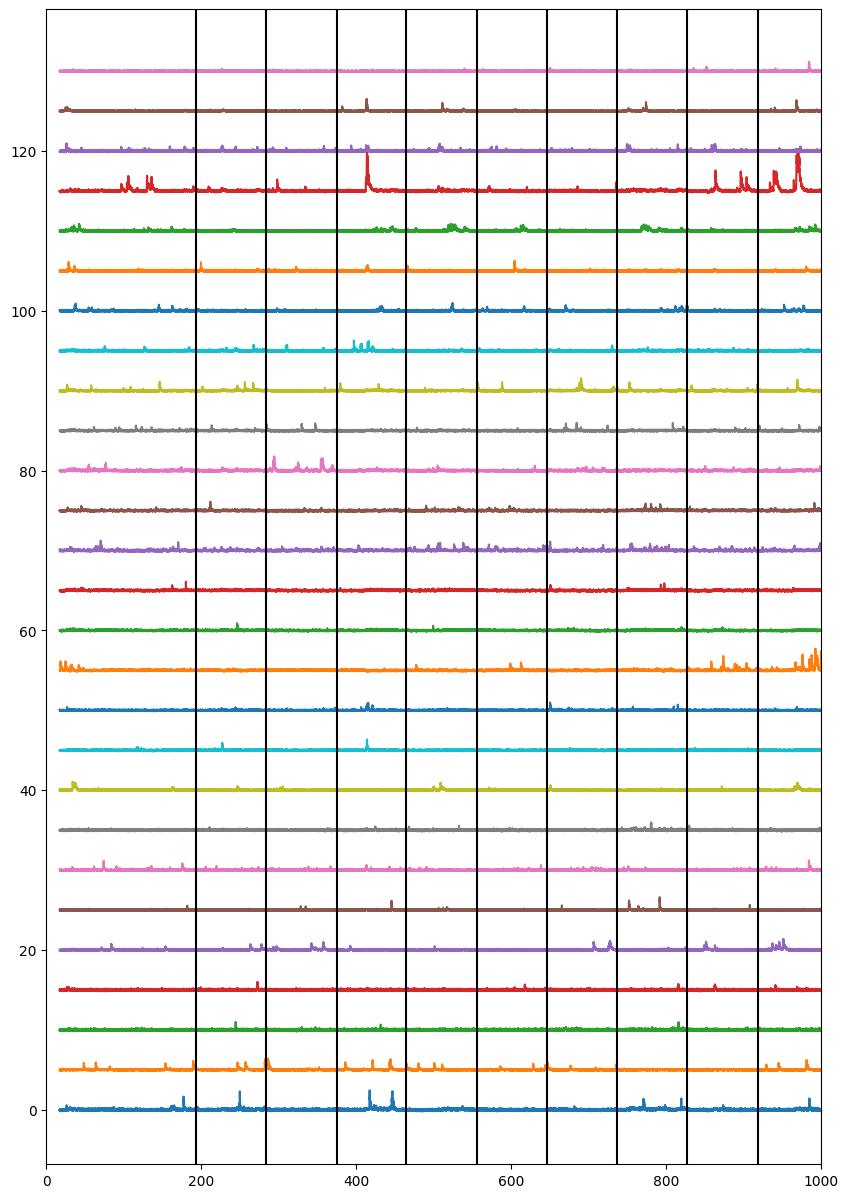

In [13]:
fig = plt.figure(figsize=(10, 15))
for i, trace in enumerate(DfOverF.T):
    plt.plot(times, trace+5*i);
for st in start_times:
    plt.axvline(st, color='k');
plt.xlim(0, 1000)

Different contrast levels

In [16]:
df.Contrast.value_counts()

Contrast
0.60    117
0.80    116
0.40    116
0.20    115
0.10    114
0.05    113
Name: count, dtype: int64

In [22]:
contrast_level = 0.05
stimes = df[df['Contrast'] == contrast_level]['Start'].values

In [28]:
stimes

array([  194.,   284.,  1552.,  2367.,  2638.,  2910.,  3453.,  3725.,
        3996.,  4177.,  4811.,  5173.,  5807.,  6350.,  6622.,  6712.,
        6984.,  7708.,  8070.,  8976.,  9519.,  9700.,  9883., 10154.,
       10426., 11150., 11603., 11874., 12236., 13051., 13504., 14862.,
       15315., 15858., 16673., 17488., 17669., 17940., 18121., 18574.,
       21562., 21833., 22014., 22648., 22739., 23191., 23553., 23734.,
       24459., 25092., 26360., 27627., 27808., 27899., 28353., 28625.,
       29168., 29349., 29530., 29621., 30073., 31522., 31612., 33061.,
       35958., 36139., 37678., 37769., 38131., 38221., 38493., 39036.,
       40123., 40394., 40575., 40756., 41662., 43291., 44197., 44559.,
       45555., 45645., 45736., 46281., 46371., 46552., 47096., 47639.,
       49449., 49540., 49631., 50989., 52980., 55425., 55606., 55968.,
       56149., 56692., 56783., 57959., 58322., 58412., 58684., 59951.,
       60857., 61581., 61671., 61762., 62577., 62667., 63935., 64841.,
      

(0.0, 3000.0)

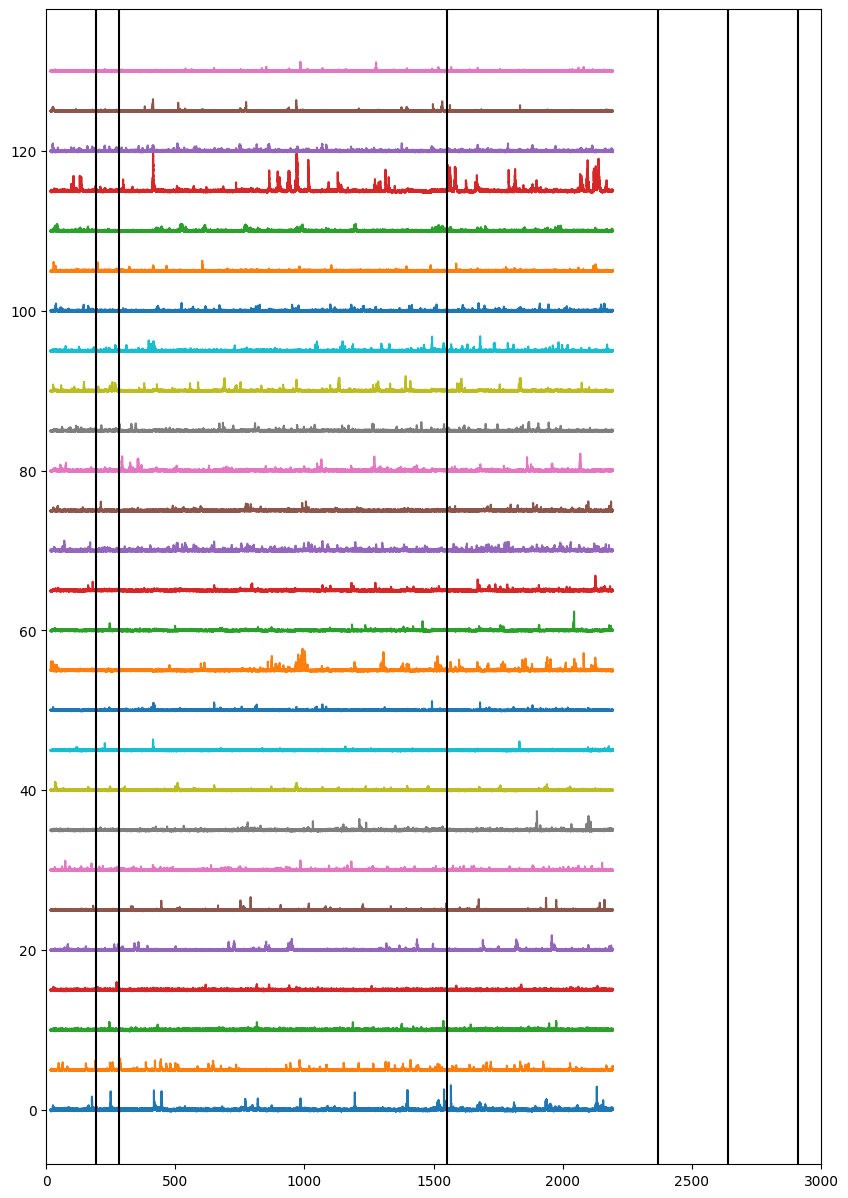

In [31]:
fig = plt.figure(figsize=(10, 15))
for i, trace in enumerate(DfOverF.T):
    plt.plot(times, trace+5*i);
for st in stimes:
    plt.axvline(st, color='k');
plt.xlim(0, 3000)

In [30]:
times

array([  17.61794,   17.6511 ,   17.68426, ..., 2193.37536, 2193.40852,
       2193.44169])

In [67]:
traces = DfOverF.copy()
prestim_frames = 30
frames_per_sec = 30
window_t = 60. # second
window_frames = int(window_t*frames_per_sec)

In [72]:
window_frames

1800

In [71]:
DfOverF.shape

(65611, 27)

In [ ]:
first_window_frame = int(df['Start'][0]) - prestim_frames
trace_t = np.arange(0,window_frames) / frames_per_sec
trace_dFF = traces[0:1800,0]

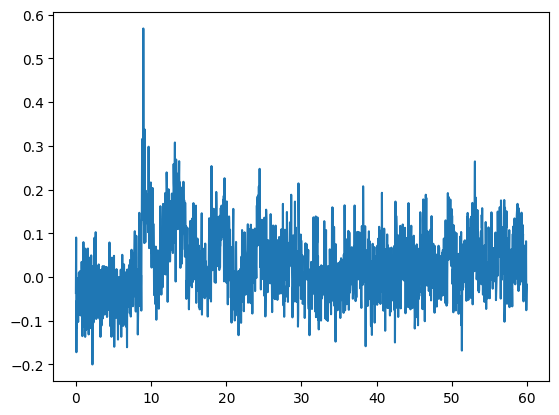

In [84]:
plt.plot(trace_t, trace_dFF);